# Interactive ECG Drawing with Matplotlib Widget

Test notebook for drawing ECG waves with mouse using matplotlib widget backend.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [5]:
# Enable interactive widget backend
%matplotlib widget

print("✓ Widget backend enabled!")

✓ Widget backend enabled!


✓ Drawing canvas ready!
📝 Instructions: Click and drag to draw ECG waves


C:\Users\hemes\AppData\Local\Temp\ipykernel_48844\476937757.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


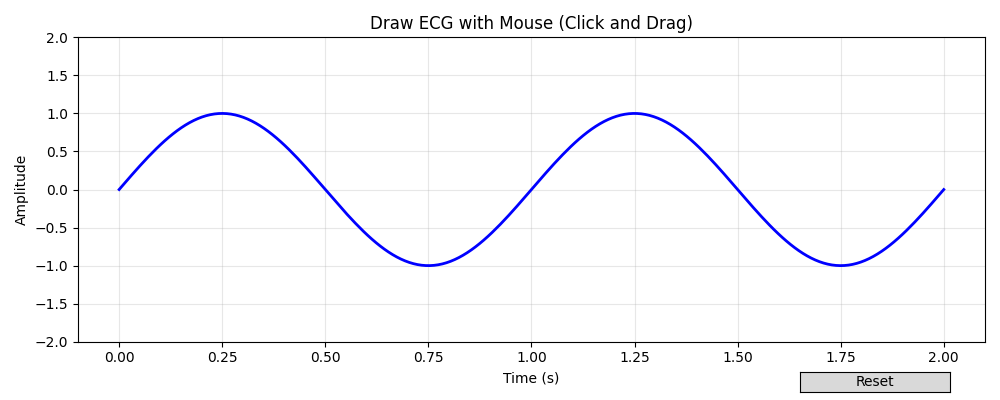

In [6]:
# Simple Mouse Drawing Test
class SimpleECGDrawer:
    def __init__(self):
        # Initialize data
        self.x = np.linspace(0, 2, 200)
        self.y = np.sin(2 * np.pi * self.x)  # Start with sine wave
        
        # Create figure
        self.fig, self.ax = plt.subplots(figsize=(10, 4))
        self.line, = self.ax.plot(self.x, self.y, 'b-', linewidth=2)
        self.ax.set_ylim(-2, 2)
        self.ax.set_xlabel('Time (s)')
        self.ax.set_ylabel('Amplitude')
        self.ax.set_title('Draw ECG with Mouse (Click and Drag)')
        self.ax.grid(True, alpha=0.3)
        
        # Drawing state
        self.is_drawing = False
        
        # Connect mouse events
        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)
        
        # Add reset button
        ax_reset = plt.axes([0.8, 0.02, 0.15, 0.05])
        self.btn_reset = Button(ax_reset, 'Reset')
        self.btn_reset.on_clicked(self.reset)
        
        print("✓ Drawing canvas ready!")
        print("📝 Instructions: Click and drag to draw ECG waves")
    
    def on_press(self, event):
        """Mouse button pressed"""
        if event.inaxes == self.ax:
            self.is_drawing = True
            print("🖱️ Drawing started...")
    
    def on_release(self, event):
        """Mouse button released"""
        if self.is_drawing:
            self.is_drawing = False
            print("✓ Drawing stopped")
    
    def on_motion(self, event):
        """Mouse moved"""
        if self.is_drawing and event.inaxes == self.ax:
            # Get mouse position
            x_mouse = event.xdata
            y_mouse = event.ydata
            
            if x_mouse is not None and y_mouse is not None:
                # Find nearest point
                idx = np.argmin(np.abs(self.x - x_mouse))
                
                # Update y value at that point
                self.y[idx] = y_mouse
                
                # Smooth neighboring points for better drawing
                window = 3
                for i in range(max(0, idx-window), min(len(self.y), idx+window+1)):
                    weight = 1.0 - abs(i - idx) / (window + 1)
                    self.y[i] = weight * y_mouse + (1 - weight) * self.y[i]
                
                # Update plot
                self.line.set_ydata(self.y)
                self.fig.canvas.draw_idle()
    
    def reset(self, event):
        """Reset to initial sine wave"""
        self.y = np.sin(2 * np.pi * self.x)
        self.line.set_ydata(self.y)
        self.fig.canvas.draw_idle()
        print("🔄 Canvas reset!")

# Create the drawer
drawer = SimpleECGDrawer()
plt.tight_layout()
plt.show()

🎨 Creating Advanced ECG Editor...
✓ Advanced ECG editor ready!


C:\Users\hemes\AppData\Local\Temp\ipykernel_48844\1063316161.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


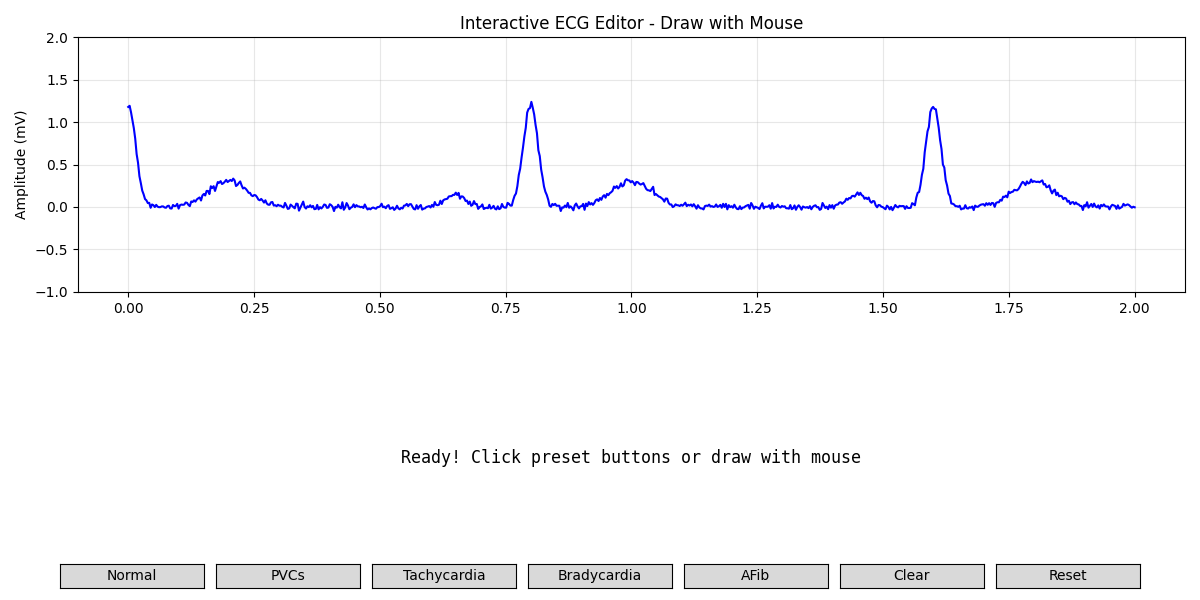


📝 Try:
  1. Click preset buttons to load ECG patterns
  2. Click and drag on the ECG plot to modify waves
  3. Use 'Clear' to start from scratch


In [7]:
# Advanced ECG Drawing with Presets
class AdvancedECGDrawer:
    def __init__(self):
        # Initialize ECG data
        self.duration = 2.0  # seconds
        self.fs = 360  # sampling rate
        self.n_points = int(self.duration * self.fs)
        self.time = np.linspace(0, self.duration, self.n_points)
        self.ecg = self.generate_normal_ecg()
        
        # Create figure with two subplots
        self.fig = plt.figure(figsize=(12, 6))
        
        # Main ECG plot
        self.ax = plt.subplot(211)
        self.line, = self.ax.plot(self.time, self.ecg, 'b-', linewidth=1.5)
        self.ax.set_ylim(-1, 2)
        self.ax.set_ylabel('Amplitude (mV)')
        self.ax.set_title('Interactive ECG Editor - Draw with Mouse')
        self.ax.grid(True, alpha=0.3)
        
        # Info panel
        self.ax_info = plt.subplot(212)
        self.ax_info.axis('off')
        self.info_text = self.ax_info.text(0.5, 0.5, 'Ready to draw!', 
                                           ha='center', va='center', 
                                           fontsize=12, family='monospace')
        
        # Drawing state
        self.is_drawing = False
        self.draw_strength = 0.3
        
        # Connect mouse events
        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)
        
        # Add buttons
        btn_width = 0.12
        btn_height = 0.04
        btn_y = 0.02
        
        ax_normal = plt.axes([0.05, btn_y, btn_width, btn_height])
        ax_pvcs = plt.axes([0.18, btn_y, btn_width, btn_height])
        ax_tachy = plt.axes([0.31, btn_y, btn_width, btn_height])
        ax_brady = plt.axes([0.44, btn_y, btn_width, btn_height])
        ax_afib = plt.axes([0.57, btn_y, btn_width, btn_height])
        ax_clear = plt.axes([0.70, btn_y, btn_width, btn_height])
        ax_reset = plt.axes([0.83, btn_y, btn_width, btn_height])
        
        self.btn_normal = Button(ax_normal, 'Normal')
        self.btn_pvcs = Button(ax_pvcs, 'PVCs')
        self.btn_tachy = Button(ax_tachy, 'Tachycardia')
        self.btn_brady = Button(ax_brady, 'Bradycardia')
        self.btn_afib = Button(ax_afib, 'AFib')
        self.btn_clear = Button(ax_clear, 'Clear')
        self.btn_reset = Button(ax_reset, 'Reset')
        
        self.btn_normal.on_clicked(lambda e: self.load_preset('normal'))
        self.btn_pvcs.on_clicked(lambda e: self.load_preset('pvcs'))
        self.btn_tachy.on_clicked(lambda e: self.load_preset('tachy'))
        self.btn_brady.on_clicked(lambda e: self.load_preset('brady'))
        self.btn_afib.on_clicked(lambda e: self.load_preset('afib'))
        self.btn_clear.on_clicked(self.clear_canvas)
        self.btn_reset.on_clicked(lambda e: self.load_preset('normal'))
        
        self.update_info("Ready! Click preset buttons or draw with mouse")
        print("✓ Advanced ECG editor ready!")
    
    def generate_normal_ecg(self):
        """Generate normal ECG pattern"""
        ecg = np.zeros_like(self.time)
        heart_rate = 75  # BPM
        beat_interval = 60 / heart_rate
        
        beat_times = np.arange(0, self.duration, beat_interval)
        
        for bt in beat_times:
            # P wave
            ecg += 0.15 * np.exp(-((self.time - (bt - 0.15)) ** 2) / (2 * 0.02 ** 2))
            # QRS complex
            ecg += 1.2 * np.exp(-((self.time - bt) ** 2) / (2 * 0.015 ** 2))
            # T wave
            ecg += 0.3 * np.exp(-((self.time - (bt + 0.2)) ** 2) / (2 * 0.04 ** 2))
        
        return ecg + np.random.normal(0, 0.02, len(ecg))
    
    def load_preset(self, pattern):
        """Load preset ECG pattern"""
        if pattern == 'normal':
            self.ecg = self.generate_normal_ecg()
            self.update_info("✓ Loaded: Normal Sinus Rhythm (75 BPM)")
        elif pattern == 'pvcs':
            self.ecg = self.generate_pvcs()
            self.update_info("✓ Loaded: Premature Ventricular Contractions")
        elif pattern == 'tachy':
            self.ecg = self.generate_tachycardia()
            self.update_info("✓ Loaded: Tachycardia (130 BPM)")
        elif pattern == 'brady':
            self.ecg = self.generate_bradycardia()
            self.update_info("✓ Loaded: Bradycardia (45 BPM)")
        elif pattern == 'afib':
            self.ecg = self.generate_afib()
            self.update_info("✓ Loaded: Atrial Fibrillation (Irregular)")
        
        self.line.set_ydata(self.ecg)
        self.fig.canvas.draw_idle()
    
    def generate_pvcs(self):
        """Generate ECG with PVCs"""
        ecg = np.zeros_like(self.time)
        beat_times = np.arange(0, self.duration, 60/75)
        
        for i, bt in enumerate(beat_times):
            if i % 3 == 2:  # Every 3rd beat is PVC
                ecg += 1.5 * np.exp(-((self.time - bt) ** 2) / (2 * 0.05 ** 2))
            else:
                ecg += 0.15 * np.exp(-((self.time - (bt - 0.15)) ** 2) / (2 * 0.02 ** 2))
                ecg += 1.2 * np.exp(-((self.time - bt) ** 2) / (2 * 0.015 ** 2))
                ecg += 0.3 * np.exp(-((self.time - (bt + 0.2)) ** 2) / (2 * 0.04 ** 2))
        
        return ecg + np.random.normal(0, 0.02, len(ecg))
    
    def generate_tachycardia(self):
        """Generate tachycardia ECG"""
        ecg = np.zeros_like(self.time)
        beat_times = np.arange(0, self.duration, 60/130)
        
        for bt in beat_times:
            ecg += 0.15 * np.exp(-((self.time - (bt - 0.1)) ** 2) / (2 * 0.015 ** 2))
            ecg += 1.0 * np.exp(-((self.time - bt) ** 2) / (2 * 0.012 ** 2))
            ecg += 0.25 * np.exp(-((self.time - (bt + 0.15)) ** 2) / (2 * 0.03 ** 2))
        
        return ecg + np.random.normal(0, 0.02, len(ecg))
    
    def generate_bradycardia(self):
        """Generate bradycardia ECG"""
        ecg = np.zeros_like(self.time)
        beat_times = np.arange(0, self.duration, 60/45)
        
        for bt in beat_times:
            ecg += 0.15 * np.exp(-((self.time - (bt - 0.15)) ** 2) / (2 * 0.02 ** 2))
            ecg += 1.2 * np.exp(-((self.time - bt) ** 2) / (2 * 0.015 ** 2))
            ecg += 0.3 * np.exp(-((self.time - (bt + 0.2)) ** 2) / (2 * 0.04 ** 2))
        
        return ecg + np.random.normal(0, 0.02, len(ecg))
    
    def generate_afib(self):
        """Generate atrial fibrillation ECG"""
        ecg = np.zeros_like(self.time)
        beat_times = [0]
        
        while beat_times[-1] < self.duration:
            interval = 60/85 + np.random.uniform(-0.2, 0.2)
            beat_times.append(beat_times[-1] + interval)
        
        for bt in beat_times[:-1]:
            amp = 0.9 + np.random.uniform(-0.2, 0.2)
            ecg += amp * np.exp(-((self.time - bt) ** 2) / (2 * 0.015 ** 2))
            ecg += 0.25 * np.exp(-((self.time - (bt + 0.18)) ** 2) / (2 * 0.035 ** 2))
        
        return ecg + np.random.normal(0, 0.05, len(ecg))
    
    def clear_canvas(self, event):
        """Clear to flat line"""
        self.ecg = np.zeros_like(self.time)
        self.line.set_ydata(self.ecg)
        self.fig.canvas.draw_idle()
        self.update_info("Canvas cleared - draw your own ECG!")
    
    def update_info(self, message):
        """Update info text"""
        self.info_text.set_text(message)
    
    def on_press(self, event):
        """Mouse button pressed"""
        if event.inaxes == self.ax:
            self.is_drawing = True
            self.update_info("🖱️ Drawing... (release to stop)")
    
    def on_release(self, event):
        """Mouse button released"""
        if self.is_drawing:
            self.is_drawing = False
            self.update_info("✓ Drawing complete! Draw more or select preset")
    
    def on_motion(self, event):
        """Mouse moved"""
        if self.is_drawing and event.inaxes == self.ax:
            x_mouse = event.xdata
            y_mouse = event.ydata
            
            if x_mouse is not None and y_mouse is not None:
                # Find nearest points
                idx = np.argmin(np.abs(self.time - x_mouse))
                
                # Smooth drawing with Gaussian kernel
                window_size = 10
                sigma = 3
                
                for i in range(max(0, idx-window_size), min(len(self.ecg), idx+window_size+1)):
                    distance = abs(i - idx)
                    weight = np.exp(-(distance**2) / (2 * sigma**2))
                    self.ecg[i] = (1 - self.draw_strength * weight) * self.ecg[i] + \
                                  self.draw_strength * weight * y_mouse
                
                # Update plot
                self.line.set_ydata(self.ecg)
                self.fig.canvas.draw_idle()

# Create the advanced drawer
print("🎨 Creating Advanced ECG Editor...")
adv_drawer = AdvancedECGDrawer()
plt.tight_layout()
plt.show()
print("\n📝 Try:")
print("  1. Click preset buttons to load ECG patterns")
print("  2. Click and drag on the ECG plot to modify waves")
print("  3. Use 'Clear' to start from scratch")

## Test Results

- If the widgets work and you can draw with the mouse, we can integrate this into the main notebook
- If widgets hang/freeze, we'll stick with the button-based approach
- The drawing should be smooth with click-and-drag functionality